In [1]:
import matplotlib.pyplot as plt
import numpy as np

Declaração de constantes

In [2]:
F = 96490 #Constante de Faraday
R = 8.315 #Constante universal dos gases

In [3]:
Nae = 155 #Concentração de códio extracelular
Ke = 5 #Concentração de potássio extracelular
Imax = 0 #Taxa da bomba em repouso
gama = 6.41025641*10**(5) #Razão área/volume da membrana celular
KNa = 7.7 #Saturação do sódio
KK = 2 #Saturação do potássio
nw = 1.7*10**(-7) #Fluidez da membrana
pe = -266.64 #pressão extracelular
T = 310 #Temperatura
S = 1 #Rigidez da membrana por comprimento
Cm = 1*10**(-2) #Capacitancia da célula


#Esses parâmetros podem ou não ser calculados:
gNa = 0.2505459082892031
gK = 1.404092733028937
Xwt = 17.39130434

Declaração de variáveis

In [4]:
#Estou fazendo isso, só pra ficar tudo organizado quando eu for fazer várias coisas diferentes
Nai = [] #Concentração sódio
Ki = [] #Concentração potássio
ai = [] #Volume intracelular
V = [] #Potêncial transmembrancio
pi = [] #pressão intracelular
Ina = [] #Corrente iônica de sódio
Ik = [] #Corrente iônica de potássio
Inak = [] #corrente iônica causada por bomba

Condições iniciais

In [5]:
Nai.clear()
Ki.clear()
V.clear()
pi.clear()
ai.clear()

#Condições iniciais
Nai.append(10.0)
Ki.append(130.0)
V.append(-0.07)
pi.append(pe)
ai.append(0.869565217)

Parâmetros do método

In [6]:
dt = 10**(-5)
Time = 50
time = 0
times = []

In [7]:
''' #Condutâncias do sódio e do potássio
gNa = (-3*Imax*(((1+(KK/Ke))**-2)*((1+(KNa/Nai[0]))**-3)))/(V[0] - (R*T/F)*np.log(Nae/Nai[0]))
gK = (2*Imax*(((1+(KK/Ke))**-2)*((1+(KNa/Nai[0]))**-3)))/ (V[0] - (R*T/F)*np.log(Ke/Ki[0]))
Xwt = ai[0]*(((pi[0]-pe)/R*T) + Nae + Ke - Nai[0] - Ki[0])

print(gNa)
print(gK)
print(Xwt) '''

' #Condutâncias do sódio e do potássio\ngNa = (-3*Imax*(((1+(KK/Ke))**-2)*((1+(KNa/Nai[0]))**-3)))/(V[0] - (R*T/F)*np.log(Nae/Nai[0]))\ngK = (2*Imax*(((1+(KK/Ke))**-2)*((1+(KNa/Nai[0]))**-3)))/ (V[0] - (R*T/F)*np.log(Ke/Ki[0]))\nXwt = ai[0]*(((pi[0]-pe)/R*T) + Nae + Ke - Nai[0] - Ki[0])\n\nprint(gNa)\nprint(gK)\nprint(Xwt) '

In [8]:
while(time < Time):
  #Cálculo de correntes
  Ina.append(gNa*( V[-1] - ((R*T)/F)*np.log(Nae/Nai[-1])))
  Ik.append(gK*(V[-1] - ((R*T)/F)*np.log(Ke/Ki[-1])))
  Inak.append( Imax*((1 + (KK/Ke))**(-2))*((1 + (KNa/Nai[-1]))**(-3)))

  #Calculo de valores
  A = -gama*(Ina[-1] + 3*Imax*(((1+(KK/Ke))**(-2))*(1 + (KNa/Nai[-1]))**(-3)))
  B = -gama*(Ik[-1] - 2*Imax*(((1+(KK/Ke))**(-2))*(1+(KNa/Nai[-1]))**(-3)))
  C = -gama*nw*(pi[-1] - pe - R*T*(Nai[-1] + Ki[-1] + (Xwt/ai[-1]) - Nae - Ke))
  D = -Ina[-1] - Ik[-1] - Inak[-1]

  Nai.append(Nai[-1] + (dt/(ai[-1]*F))*A - (dt*Nai[-1]*C/ai[-1]))
  Ki.append(Ki[-1] + (dt/(ai[-1]*F))*B - (dt*Ki[-1]*C/ai[-1]))
  ai.append(ai[-1] + dt*C)
  V.append(V[-1] + (dt*D/Cm))
  pi.append(pe + S*(ai[-1] - ai [0])) #Nesse caso, o ai[-1] já é o passo j+1, visto que o ai já foi calculado.
  times.append(time)
  time += dt

print("Terminou")

Terminou


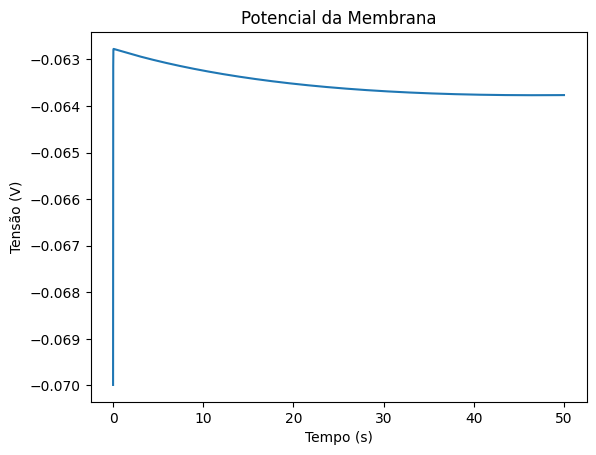

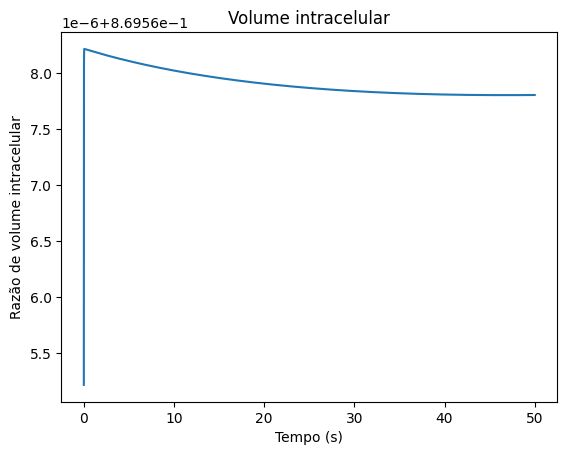

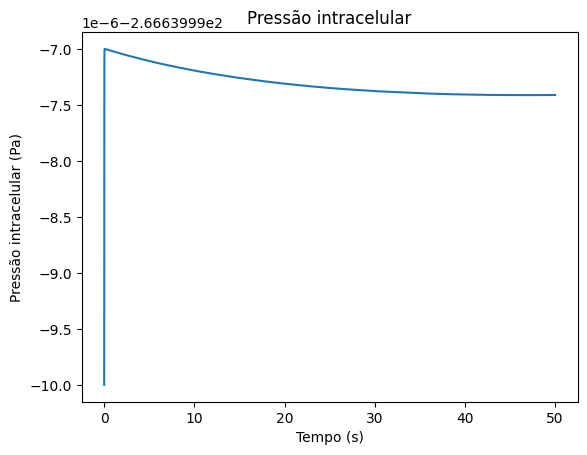

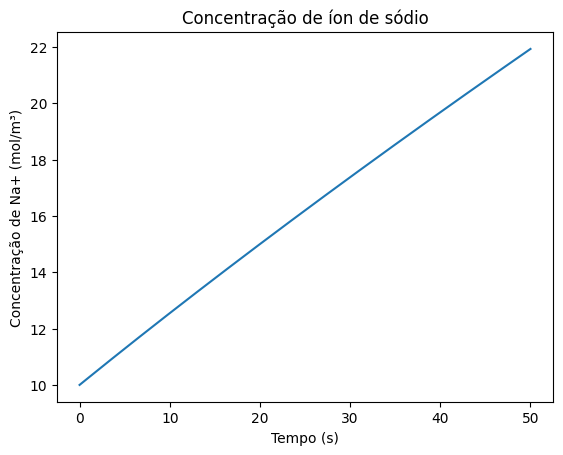

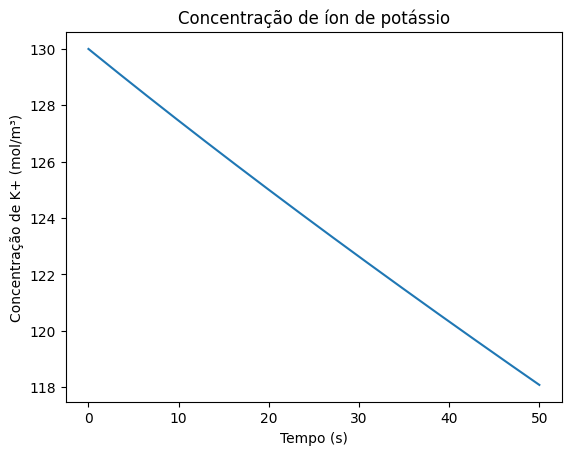

In [9]:
#Potencial da membrana
plt.plot(times[0:-1:10], (V[1:-1:10]))
# plt.ylim(-0.1, 0.08)
plt.xlabel("Tempo (s)")
plt.ylabel("Tensão (V)")
plt.title("Potencial da Membrana")
plt.show()

#Volume intracelular
plt.plot(times[0:-1:10], ai[1:-1:10])
# plt.ylim(0.5,1)
plt.xlabel("Tempo (s)")
plt.ylabel("Razão de volume intracelular")
plt.title("Volume intracelular")
plt.show()

#Pressão intracelular
plt.plot(times[0:-1:10], pi[1:-1:10])
# plt.ylim(-267, -266)
plt.xlabel("Tempo (s)")
plt.ylabel("Pressão intracelular (Pa)")
plt.title("Pressão intracelular")
plt.show()

#Concentração Na+
plt.plot(times[0:-1:10], Nai[1:-1:10], label = "Na+")
# plt.ylim(0, 12)
plt.xlabel("Tempo (s)")
plt.ylabel("Concentração de Na+ (mol/m³)")
plt.title("Concentração de íon de sódio")
plt.show()

#Concentração K+
plt.plot(times[0:-1:10], Ki[1:-1:10], label = "K+")
# plt.ylim(125, 140)
plt.xlabel("Tempo (s)")
plt.ylabel("Concentração de K+ (mol/m³)")
plt.title("Concentração de íon de potássio")
plt.show()
